# Data Hackerspace 'Midterm'
** 15 points total **

These problems are designed to be a bit different from the previous 'challenge' problems. Instead of instructing you to do something very specific, these problems are more general and approach-driven (like something you'd see on an actual interview, or in a Data Science job).

Thus, the process of completing these problems is just as important as the 'correctness' of the answers. These questions are also a bit more open ended. Make the assumptions that you think are valid, and be sure to **comment in** those assumptions in your code.

* Due Date: **November 29th, 11:59pm. No late Submissions.**
* Credit is given for both accuracy, and a thoughtful algorithmic approach.
* Submit this assignment emailing your completed `*.ipynb` to Tyler using the email we gave you in class (Keep your output!)

## Problem 1: Email Address Matching
** 4 points **

You are given a list of names and a list of email addresses.  How would you automatically assign the 'best' email from the list of emails to the corresponding name from the list of names?

You can find a list of names in `./names.txt` and the list of emails in `./emails.txt`.

Output a list of `(name, email)` tuples for name/email pairs that you think match 'best'.

In [1]:
def match(email, name):
    split_name = name.split()
    for split in split_name:
        return split.lower() in email

def email_matcher(emails_file, names_file):
    matches = []
    with open(emails_file, 'r') as emails_list, open(names_file, 'r') as names_list:
        for emails, names in zip(emails_list, names_list):
            if match(emails, names):
                matches.append((emails, names))
    return matches

In [2]:
email_matcher('emails.txt', 'names.txt')

[('shannon.r.adams@hotmail.com\n', 'Ann Diaz\n'),
 ('regina.smith@hotmail.com\n', 'Regina Gonzales\n'),
 ('dana.anderson@yahoo.com\n', 'Dan Timothy Kelley\n'),
 ('mandy.b.phillips@gmail.com\n', 'Phillip Jenkins\n'),
 ('margaret.andrews@yahoo.com\n', 'Andrew Richard Porter\n'),
 ('brooks@lee.com\n', 'Lee A. Davis\n'),
 ('todd.day@hotmail.com\n', 'Todd Brown\n'),
 ('joshua.contreras@hotmail.com\n', 'Joshua L. Gross\n'),
 ('john5611@jackson.com\n', 'John John Watson\n'),
 ('jason3011@faulkner.com\n', 'Jason Brad Chapman\n'),
 ('james.brooks@gmail.com\n', 'James C. Vasquez\n'),
 ('rebecca0@swanson-johnson.com\n', 'John Michael Sullivan\n'),
 ('joseph.smith@yahoo.com\n', 'Joseph Keith Allen\n'),
 ('amann@yahoo.com\n', 'Ann Thomas Ali\n'),
 ('kenneth4214@perez.com\n', 'Kenneth D. Smith\n'),
 ('lisa0@scott.com\n', 'Scott Alvarez\n'),
 ('cynthia.johnson@yahoo.com\n', 'John Kimberly Mcintyre\n'),
 ('steven45638@williams-kim.info\n', 'William Mcneil\n'),
 ('melissa.a.roberts@gmail.com\n', 'Rober

## Problem 2: San Francisco City Salaries
** 2 points **

In `Salaries.csv`, you'll find a list of pay data for the public employees of San Francisco City for the years 2011 - 2014

Write a function that will take this data and plot the median pay change by occupation between 2011 and 2014. You can limit your visualization to the top 25 most populous professions.

(Data courtesy of https://www.kaggle.com/kaggle/sf-salaries)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def median_sf_salaries_change(filename):
    data = pd.read_csv(filename, dtype={'ID': object, 'EmployeeName': object, 'JobTitle': object, 
                                       'BasePay': object, 'OvertimePay': object, 'OtherPay': object,
                                       'Benefits': object, 'TotalPay': object, 'TotalPayBenefits': object, 
                                       'Year': object, 'Notes': object, 'Agency': object, 'Status': object})
    data['TotalPay'] = data['TotalPay'].astype(float)
    data['Count'] = 1
    data = data.groupby('JobTitle').agg({'TotalPay':'median', 
                                         'Count':'sum'})
    data = data.sort_values('Count', ascending=False)
    data = data[:25]
    data = data.drop('Count', 1)
    graph = data.plot(kind='bar', title ="Median Pay Change by Occupation", legend=False)
    graph.set_xlabel("Occupation")
    graph.set_ylabel("Pay Change")
    plt.show()

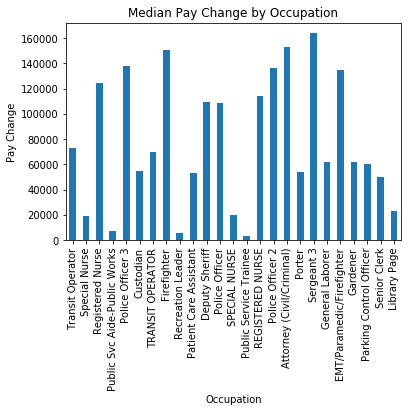

In [5]:
median_sf_salaries_change('Salaries.csv')

## Problem 3: Airline Tweets
** 3 points **

Given a dataset of Tweets regarding different airlines (`Tweets.csv`), write a function that returns an ordered list of the most serious complaints against each airline.

**Note:** The sentiment analysis has already been performed, and you are given a sentiment score, complaint label (`negativearesas`), and complaint label confidence markers for each tweet. For maximum accuracy, you may wish to utilize all three of these values in your analysis.

(Data courtesy of https://www.kaggle.com/crowdflower/twitter-airline-sentiment)

In [6]:
import pandas as pd

In [7]:
def airline_complaints(filename, airline):
    data = pd.read_csv(filename)
    data = data[data['airline'] == airline]
    data = data.sort_values(['airline_sentiment',
                             'airline_sentiment_confidence',
                             'negativereason_confidence'],
                            ascending=[True, False, False])
    return data['negativereason'].values.tolist()

In [8]:
airline_complaints('Tweets.csv', 'American')

['Customer Service Issue',
 'Flight Attendant Complaints',
 'Late Flight',
 'Cancelled Flight',
 'Customer Service Issue',
 'Customer Service Issue',
 'Late Flight',
 'Late Flight',
 'Late Flight',
 'Customer Service Issue',
 'Lost Luggage',
 'Customer Service Issue',
 'Late Flight',
 'Lost Luggage',
 'Cancelled Flight',
 'Cancelled Flight',
 'Customer Service Issue',
 'Cancelled Flight',
 'Cancelled Flight',
 'Cancelled Flight',
 'Flight Attendant Complaints',
 'Late Flight',
 'Lost Luggage',
 'Customer Service Issue',
 'Customer Service Issue',
 'Cancelled Flight',
 'Flight Attendant Complaints',
 'Customer Service Issue',
 'Customer Service Issue',
 'Customer Service Issue',
 'Customer Service Issue',
 "Can't Tell",
 'Late Flight',
 'Bad Flight',
 'Bad Flight',
 'Bad Flight',
 'Cancelled Flight',
 'Customer Service Issue',
 'Late Flight',
 'Cancelled Flight',
 'Customer Service Issue',
 'Customer Service Issue',
 'Late Flight',
 'Late Flight',
 'Customer Service Issue',
 'Lost Lugga

## Problem 4: City Name Cleaning
** 3 points**

Suppose you have a very large list of the names of all large cities in the world. (Number of records ~= 100,000) Many of these cities will contain common overlapping words like “Mobile”, “Rugby” or “Salmon”. Your task is to automatically (and hopefully quickly) filter out as many of these 'common' words as possible. Output a list of world cities that have these common words removed.

Unfortunately, we don't have a clean list of cities, but rather a `*.csv` file that contains a bunch of other information. You can find this file in `worldcities.csv`

(Data courtesy of https://www.maxmind.com/en/free-world-cities-database)

In [9]:
import pandas as pd
import nltk
from nltk import FreqDist

In [10]:
def city_name_cleanser(filename):
    cities = pd.read_csv(filename, encoding='latin')
    names = cities['City'].tolist()
    names = str(names)
    text = nltk.word_tokenize(names)
    text = nltk.Text(text)
    common = FreqDist(text).most_common(500)[2:]
    for word in (item[0] for item in common):
        cities = cities[cities['City'].str.contains(word) == False]
    return cities['City'].values.tolist()

In [11]:
city_name_cleanser('worldcities.csv')

['abbey-cwmhir',
 'abbey dore',
 'abbots ann',
 'abbotsbury',
 'abbotsham',
 'abbotskerswell',
 'abbots worthy',
 'abbotts ann',
 'aber',
 'aberaman',
 'aberangell',
 'aberargie',
 'aber-arth',
 'aberbargoed',
 'aberbeeg',
 'aber-bran',
 'abercairny',
 'abercanaid',
 'abercarn',
 'aber cowarch',
 'aberdalgie',
 'aberdare',
 'aberdour',
 'aberdour',
 'aberdovey',
 'aberdyfi',
 'aberearne',
 'aberedw',
 'abereiddy',
 'abererch',
 'aberfam',
 'aberfan',
 'aberfeldy',
 'aberffraw',
 'aberfield',
 'abergavenny',
 'abergorloch',
 'abergwaun',
 'abergwesyn',
 'abergwili',
 'abergwyfni',
 'abergwynfi',
 'abergynolwyn',
 'aberhafesp',
 'aberkenfig',
 'aberlour',
 'abernant',
 'aber-nant',
 'abernethy',
 'aberporth',
 'abersoch',
 'abersychan',
 'abertawe',
 'aberteifi',
 'aberthaw',
 'abertridwr',
 'aberystwyth',
 'aboyne',
 'abram',
 'abthorpe',
 'aby',
 'acaster malbis',
 'acha',
 'achafubil',
 'achagarve',
 'achahoish',
 'achanalt',
 'achaneas',
 'achany',
 'achaphubuil',
 'acharn',
 'acharn

## Problem 5: IMDB Crawler
** 3 points **

In an earlier challange problem, you wrote code to take an IMDB page and parse out specific information about the movie and cast.

In this problem, you will go a step further and write a web-scraper to build a database of movie information.

Write a function that takes as an argument a 'seed' URL (guaranteed to be somewhere on www.imdb.com) and crawls the movie links that it finds on that page. You should save the following characteristics about each movie:

* Title
* Rating
* Duration
* Release Date
* Budget

For the sake of time, you can also **limit your crawler to scraping and saving 25 movies.**

The function should save the data to a JSON file.

** Note: ** You're encouraged to separate your code into function(s) that scrape data from IMDB, and function(s) that perform the crawling logic.

In [12]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import json

In [13]:
def imdb_scraper(url, out_file):
    html_doc = requests.get(url).text
    soup = BeautifulSoup(html_doc, "html5lib")
    
    title_unclean = soup.find("h1", {"itemprop": "name"})
    if hasattr(title_unclean, 'text'):
        title_unclean = title_unclean.text.replace(u'\xa0', u' ')
        title = title_unclean.split(" (")[0]
    else: 
        title = "Not provided"
    
    rating_unclean = soup.find("span", {"itemprop": "ratingValue"})
    if hasattr(rating_unclean, 'text'):
        rating_unclean = rating_unclean.text
        rating = rating_unclean.split()[0] + "/10"
    else: 
        rating = "Not provided"
    
    
    duration_unclean = soup.find("time", {"itemprop": "duration"})
    if hasattr(duration_unclean, 'text'):
        duration_unclean = duration_unclean.text
        duration = duration_unclean.split()[0] + ' ' + duration_unclean.split()[1]
    else: 
        duration = "Not provided"
    
    release_date_unclean = soup.find("a", {"title": "See more release dates"})
    if hasattr(release_date_unclean, 'text'):
        release_date_unclean = release_date_unclean.text
        release_date = release_date_unclean.split()[0] + ' ' + release_date_unclean.split()[1] + ' ' + release_date_unclean.split()[2]
    else: 
        release_date = "Not provided"
        
    try:
        budget_index = html_doc.index("Budget:")
        dollar_index = html_doc[budget_index:].index("$") + budget_index
        end_index = html_doc[dollar_index:].index("<") + dollar_index
        budget_unclean = html_doc[dollar_index:end_index]
        budget = budget_unclean.split()[0]
    except ValueError:
        budget = "Not provided"
    
    movies = {
        'Title': title,
        'Rating': rating,
        'Duration': duration,
        'Release date': release_date,
        'Budget': budget
    }
    
    with open(out_file, 'w') as f:
        json.dump(movies, f)
    
    return movies   

In [14]:
imdb_scraper('http://www.imdb.com/title/tt5052448/', 'movies_database.json')

{'Budget': '$5,000,000',
 'Duration': '1h 44min',
 'Rating': '7.7/10',
 'Release date': '24 February 2017',
 'Title': 'Get Out'}

In [15]:
def imdb_crawler(seed_url, out_file):
    imdb_links = {}
    links_to_scrape = [seed_url]
    
    while links_to_scrape and len(imdb_links) <= 25:
        scrape_page = links_to_scrape.pop()
        try:
            r = requests.get(scrape_page, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) Gecko/20100101 Firefox/47.0 Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv:42.0) Gecko/20100101 Firefox/42.0'})
        except:
            continue
        soup = BeautifulSoup(r.text, "html5lib")
        for link in soup.find_all('a'):
            try: 
                href = link.get('href')
            except requests.exceptions.ConnectionError:
                time.sleep(5)
                continue
            if not href or not href.startswith('http'):
                continue        
            if not href in imdb_links:
                imdb_links[href] = [scrape_page]
                if href not in links_to_scrape:
                    links_to_scrape.append(href)
            else:
                imdb_links[href].append(scrape_page)
    
    for key in imdb_links.keys():
        if "www.imdb.com/title" in key:
            movies = imdb_scraper(link, out_file)
            with open(out_file, 'w') as f:
                json.dump(movies, f)
    for value in imdb_links.values():
        for element in value:
            if "www.imdb.com/title" in element:
                movies = imdb_scraper(element, out_file)
                with open(out_file, 'w') as f:
                    json.dump(movies, f)
    
    return imdb_links

In [16]:
imdb_crawler('http://www.imdb.com/', 'movies.json')

{'http://m.imdb.com?ref_=ft_mdot': ['http://www.imdb.com/'],
 'http://pro.imdb.com/signup/index.html?rf=cons_ft_hm&ref_=cons_ft_hm': ['http://www.imdb.com/'],
 'http://pro.imdb.com/signup/index.html?rf=cons_nb_hm&ref_=cons_nb_hm': ['http://www.imdb.com/',
  'http://www.imdb.com/',
  'http://www.imdb.com/'],
 'http://www.imdb.com/?ref_=helpms_helpftr_cons': ['https://help.imdb.com/imdb?ref_=cons_ftr_imdb'],
 'http://www.imdb.com/?ref_=helpms_helphdr_cons': ['https://help.imdb.com/imdb?ref_=cons_ftr_imdb'],
 'http://www.imdb.com/conditions?ref_=helpms_helpftr_conditions': ['https://help.imdb.com/imdb?ref_=cons_ftr_imdb'],
 'http://www.imdb.com/helpdesk/login_problems?ref_=helpms_helpftr_loginhelp': ['https://help.imdb.com/imdb?ref_=cons_ftr_imdb'],
 'http://www.imdb.com/privacy?ref_=helpms_helpftr_privacy': ['https://help.imdb.com/imdb?ref_=cons_ftr_imdb'],
 'https://advertising.amazon.com/lp/imdb?ref_=ft_ad': ['http://www.imdb.com/'],
 'https://getsatisfaction.com/imdb': ['https://help.